In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [35]:
from arango import DefaultHTTPClient, ArangoClient
client = ArangoClient(hosts="http://localhost:8529/")
db = client.db("klg_database", username="root", password="200199")
multichain_wallet = db.collection("multichain_wallets")
wallet = db.collection("wallets")

In [674]:
address=['0xda874f844389df33c0fad140df4970fe1b366726',
 '0x49e3d0846c6e3d968201c1db375870e6a7386cc5',
 '0x104feb5cd1a56eca6405c48331ce2fd5bd9eaa04',
 '0x70b71b550668562b2aec29a1aad3bc7fdf283597',
 '0x3df551bb6b29eb05fc709a25f8f05e07119d99a9',
 '0xe25e044d1b59caf7c4bd7f7e2d7065d20292aa77',
 '0x7bf48d6dea7f6363e049dcfc243eb6ddae543c36',
 '0x18f93fa526e598769fd909f1d2c82315219d49ed',
 '0x35d1223cb4bd658c03a80a92c38bcdc60a965f5e',
 '0x79d1656267042998985cc63d9242d4985f4b9425',
 '0xc01168001d29f28c7d20c8ca65b6e53f185a7e71',
 '0x230c40ff3dd28910a959fe135342ce9e8250ed12',
 '0xa2c9aa6d3312d0e50e9f5181f14c3e7b29fb5dd4',
 '0xc8ddbbd6a6b846c1753290b62e18f9f51c6fbb53',
 '0xd66ba9b7d332ed5f399ca907bab7686292b14cdf',
 '0x9431e0e583a9f68abe709d755403ebf6be0fbf1a',
 '0x837b764f2ecfd979c948361804915d68db926a49',
 '0x939cac27d5944bafa6571fe7a3552effa72db1de',
 '0xc08d46ff5bab09ec2a04b309ce7ad1dbe1af77e9',
 '0x4f03745d7963462cdbb0050f02f99025fed52976',
 '0xdde9c12718217f792228ac1ce4c4a04a92b15735',
 '0xc5834255e23a2207916beccda65f17c8a58fef1d',
 '0x560dbf7f837378f81f5aa188a3864cd8214d53c6',
 '0xc133b016457176434ff976f413b849f48ae25c05',
 '0x853cf1b5c56c387f20bdebb761426e7b70ed6855',
 '0xfb6f987bea53a71e0b629bff3dcfcf59b69f77ab',
 '0xe4c48a79cf07d894833f049f3dec640130a7b067',
 '0xdb768efff52b7e5114988629dee73533663edce1',
 '0x0d9f4d0dabbfa76a5ccec6a1542326ca3da57ae5',
 '0xcba1a275e2d858ecffaf7a87f606f74b719a8a93',
 '0x3c6b7b0fdb4e87d08079594218eb67c94e1cfa29',
 '0xb7c9eee1d14d4d77fd27c0cc7a902fa58b5e56e4',
 '0x2eb25541f54472a9caf21ea56ae1dbcb0571b17d',
 '0x9736a03825b122d5a98f2fb423625a09cc0b68f2',
 '0x215c00f3fc65efcca48d0376f73090c53fd491ae',
 '0x40ed4409d9b458eb5aa0b74257a977d0814aaa15',
 '0x28a98f260d1096290a54b45e3a15e53a5b39acc2',
 '0xcbecc50cf728f59948d4e9bc0abb1797abf5764f',
 '0xc2ee0824265233f0ac4f7c40ee4f432730105b7a',
 '0x2a0a4de3a323141676e40b403412059b1f89c587',
 '0xfc0d7985d69aaba7b26e018d4bec8f018746f6a4',
 '0xdb09782a7a3bc41b3dd1b9b0c31d141dcfa44ab1',
 '0xe18ed1a99d36bb8008508ba482c02acf06d925fc',
 '0xd56353e0bdc41ad232f9d11109868703c1e2b2b9',
 '0x4f2b2419d6e6b887b803dc27a4e0ecab7d8c85b4',
 '0x067368d5fcf2dab2cea24be0456298b541c87580',
 '0xbacf88adb2e62c398f2a02636087a3dc3dcb9871',
 '0xc3317062e170f5794825dc5d93d6b045f06bf3a5',
 '0x37ffe93c07b80062454dcca32c4c0971956ab0bd',
 '0x1f4d2d20eaa660561349f1f81e91727e782e150a',
 '0xde092a220313cede58750434b66d46b5ff494cbb',
 '0x8953172b0bb93e1115afd301102738e9ad5e1b7f',
 '0x7420fa58ba44e1141d5e9adb6903be549f7ce0b5',
 '0x8f1027cc0145e106122aa63e9e26e7afb7ace1f4',
 '0x4fdc025f10e75fb8673258c007c3b762bc0eddb0',
 '0xcbbd0053b3750264e16f9d7116bd0a865f94cf9e',
 '0x70868f0fe4c17392eced8734be8bda110095d1cd',
 '0x94e34e8dd4c8e4cc21efab9838e0d4a69af12ef9',
 '0x06f744343545010898eed6e3f0f8f1d9b005e9e4',
 '0x5515a4f51bdae6e302c5b36ab3bceeaa48acf39e',
 '0x686d6e2ac31ce00d364a6ecce01d5828266d50ec',
 '0x2879ca63bf06da7a73775947a608aa0b322f2fa3',
 '0x6e849a1d6433506b2f36f808c05be1d907f2d9c3',
 '0x6549b4a18ff62aafaa8c5f265ed0dc43e6e9665a',
 '0x2db98d6507f14615cd9b9b287d8109328b6dc209',
 '0x88c9a972f47c82ada656889e5e5d8c97fe3df301',
 '0x553a463f365c74eda00b7e5aaf080b066d4ca03c',
 '0x5241f256a0d445509a54ae7d0d978b0ccad04174',
 '0x10f78cc1fd611d80ce66d1fbaba5aedf4699d202',
 '0xd001a432318c1eb228c5e9ac9a55c24f2f32ef2a',
 '0x6532a7c47b033e83eac702b2baecdb8b834558de',
 '0x80bfabc236fde7da1e74eb809741f5a07f09e796',
 '0x741442323d765d26bed375f8a1dd9f2dc4f81732',
 '0xd51504f5cea4905585311121a92e2ed9b714f374',
 '0xdeb4aedb03d8277f6dabe074796a283e71007076',
 '0xcbf19248753f2ce5c81a50565f514ea556718050',
 '0xed0bb551aa61022d87ea49c6b7ffeeada9e14738',
 '0xe34a3aa2032af0279f8fd024b4930e55c63c4c08',
 '0xea3ce02ebc991992f0f504a27f5b860cd40dbbd2',
 '0x2cfe9ee7241c980596f3ec3cfc0098b995c6163a',
 '0x67fc1f7ed829ad5b86c78189795b1bc58ce33843',
 '0xbc5fca1e70058fb5140f229b5b64929ca616d76a',
 '0xd450e0636e5babe4cc502cc6451a951ec5fde684',
 '0xceb4d74c140f0a7a35b7e37033ba53b8ea7ad327',
 '0x16248c2b45e839a8ab309cb1110b73af4c09c39c',
 '0x21cfe08c7ddb08a8e5fa04baac8b2a1457696731',
 '0x7347f924ebaa4541141e706f5ab64c5b9bd4db24',
 '0x6a58526a51647a5e18fefa5c4fcda56d482ed27c',
 '0x5a072f9e491d098e71beb4cc64a878955dceaa1f',
 '0x3e0b81c7b552de2b1c212f8efc163c0fa81ded82',
 '0x0da62d394cdf09986e43a8c6c3b6125c51d903cd',
 '0x6b1acf65c2b9302a295d7aadd83a7e874346f094',
 '0xf89116842ec30c03762ae4845b462739af430fab',
 '0x45d3730a8f811519f3cc310d54ffc4d2142b3773',
 '0x8e445422baa49c7b98645e918577de7d48280384',
 '0x4bded9698d3ed44a69e64f4db1c29d51eb7ec6a1',
 '0xa6a22bf9285f2b549caa0a8a49eb7ea9dfd8d03e',
 '0xa0a09ea9cc8defdf84aceb1ff9e77287fde76fb6',
 '0xd4f5c443426ecd7d499ee7422f3cb82f79a52f57',
 '0x87246d341be37a9633072c633e40dc239d1a7a64',
 '0x294900e9ded8d18433491be59c8d4d64392c14ec',
 '0xce4a6892f9fccd71a8bc046ca95474b1784c034f',
 '0xd78c609e8e232f346fe06caab29662fa469960e8',
 '0xfd26c9d87b8dbbe0b36665c945b6753fd457230e',
 '0xedfd621e4af2ecaf83872502b8cee424ab498972',
 '0x0a6077c72e2d68d820906ba577783de7654fca54',
 '0x1dd170c800c55831a5eacee402109cb66c3db0a4',
 '0x84ea629dc0bde080dbf7a7e335d527d03279c60d',
 '0x382ed27251923a122ced2bb253f8ac6849f7f230',
 '0xf79a35de4ce6c7d40f513e04915db2eab2f2fe2b',
 '0xfaf0c4d113d4387fc4d0eabfbeb8aeff0ec2d1d5',
 '0x6fce63859a859a0f30ed09b12f5010d790618ca4',
 '0x9192e5505d7d4ac45bf82282502066617b0dd48e',
 '0x907a7104c4bc35c1dfd36e9bcedbc07301167da3',
 '0x22416df834fa69a57f366bdecc42b21eb38e5d2e',
 '0x608d24e5eb8e7c9e274e14f73f161db0276926c3',
 '0x32d2d8a08e29668492724b83d81c750123b6b905',
 '0x783d84d175bcc6312520ae45daa15c7eaab75b28',
 '0x746f71b2112dd67b70bd1a74e778c12aaad4018a',
 '0xbc313ee485c85ad2d373c74762ce503b9a731606',
 '0xccca56d2df086ab16f305f15240e8d4254479245',
 '0x04c18cbf703c72591f1800b52d801a948f55e00c',
 '0xe9f3ba9d53ddb1dfb39e391476ee046c817e2326',
 '0x73239a06de2fc0a00bf06bfda9f11c432e94f6e1',
 '0xdbc673405385fdc6ce2dc3db8cc18b03a6e6abfd',
 '0x631e7102fd2283ef00fb412cce817bbd66d8335b',
 '0xa9f6af9367722e7f9e10257511e57c2811fa54ff',
 '0xd5c49af8d7f56c7debb9dcfc8b26a93b2db1a2f2',
 '0x5eb1ca2d9d250ffad144c7b6f0191fafc97ae1ee',
 '0x0110ad3cf10a6d04993bec37bdccba6ee2c48a27',
 '0xf0cfd621c8aaa309b4dc3f2ef6e1fbe32a7fd30e',
 '0xcaf3d2965c237bae5437626552fff699bcaa2152',
 '0xf6c239eba307cb2e054fa696664f2170b9219d98',
 '0x49f698532fcda7cf7db1293661ef4b6131630cab',
 '0xa1e41f1c2f4c30e9738973d7b8e723578578dc36',
 '0xc66cb0b1f6e4573f29a27a046d92bcd704905b22',
 '0xc797e9b7b99d1b0020b640be930169d908dbe72a',
 '0xe8b49d06cf4d623db20cc48ebfe2acc70b120497',
 '0x8d7b75163b70862acbf8b0f987acd25ab00fab08',
 '0x5f0a0e3b30d304fba56e2eee3a442b0bb5c40275',
 '0xd79fe5ca182b112e62d1466068b572493b88cb24',
 '0x9b9e9ff33edbe8da3007b3588c5072d824b2cc35',
 '0xe4101c371bd484e59c76210545eff3ec7f294093',
 '0x60ee8465dc43245c6c2989b1089e476d3a0a717d',
 '0x7f35ba1a94d77023ca997379193d5af925f2b1fb',
 '0xa8ee946fcfb3a4229e8b052d09e115d243feff13',
 '0x5c3f126c107ee8c914e6a5b3d21f40d4f83937f4',
 '0x746ab5093073c184a4f9957d85f4a8327ad1a3f0',
 '0x70e9f738aec82ad71d9977f54c5e565d8d8ce115',
 '0x5b293dc12ec36fe6ed665e0b2c41b20d187e6f6a',
 '0x3a5da240825ef8c8091f32f971f77bd0075f6b61',
 '0xaf050b7d479080776287852b2b002a86fd998c93',
 '0xf1696080f1b487a557d3da868a1fdf0386f35491',
 '0x96543b042e67baac2fc2281bd539c23c6c47b6c1']

In [467]:
len(address)

154

In [4]:
address=['0x15395fd02c359a55f776653720247b92bee1c373',
 '0x422d62b5053ef9677b0bc741263e28ea846dd45f',
 '0xb821a5da474c1baa1f3e3e6e440171cf08c7396a',
 '0x0d345b079b9e3fa330c88bd1e713469bf239047f',
 '0xf1f34dca3ec4ed619b6610a97ee720cf2078f6b7',
 '0x4c75dfdb349751e058cd3a7e6df29c82145b61d3',
 '0xe18b2804a7c25e0895630e6156252dc375dd993b',
 '0x26a2ca1e62f739f18c45867ab87bf7b87de2d813',
 '0x21f836ef326abed3ebf2eac9817c9ed1022c7716',
 '0xfb50928e5e618a3dfae92e7c7e7818a5f80c4bc2',
 '0x86121466c57705dba9a4753ed55e95ef72e4f6e1',
 '0xaa7fb24205a142bc23388e411199c6aa1528d650',
 '0xe289a24fc2859fa9fb4b5acc97de7d4d6f0dc831',
 '0xfe8260a826dc1f6e606118a2069f564d7a50ae5f',
 '0xd71b19be04810ddfba7e4b68611073c931d3633f',
 '0xd84ed0cc0a385337a9c98c9d0eb30a952f3970af',
 '0x8467d7e3383ef07a382570eabffe4b92a7a5c67f',
 '0x48f78003f2fd9575f7a75d8591eab4788e50a82c',
 '0x9d0ddf73322ece2bbdd79c47fb308538e981a7f3',
 '0xea4c5bd8fb85130439e01ee3a3f0348edcac0858',
 '0xab69577c9d63e982fceaf841984cdcae53cf4458',
 '0x5bef57fcb77388752b4a8128a945a9a89a748a1e',
 '0x69353c7fe37875c0f83dc7170428ef8184a15914',
 '0x1b49ec2ff08f87a8108db86e32e26dd465db2db3',
 '0xa8ea5c302d8ffc5f758370e1c91df79ec0d77a0e',
 '0x028ba041704644a05d49da2c72cd0ece5f37bc46',
 '0xd69de0d2cb5a1d3a52228ebe7beb03d76cca668e',
 '0x17ea381b38da6633eaeaffd3cc4351028cdba7d1',
 '0xc7f8689d426975ed7f97f304e512f54c0fde8d02',
 '0x7b5e65da56720688cd41f2cafacb59a0abae7831',
 '0x0858aa66dfcba0a3e29dc817d42d0aeff613b113',
 '0x0fc333ab7302b26eeb6ee4e3a332380a17b6930c',
 '0x75cacaf3204e911cee3fe0a20fdbadd2491316fa',
 '0xc4c6fb37875b8d9c1c8e10f18b4bc7ca874a1627',
 '0x4ef70624cea82b32aefa89714a4b100f2cc54e79',
 '0x3a08a90fb4fbefd4961eaeb85fe1c2a3419846b9',
 '0xdec7eccd6e1abf4149b36ad5dd53afaf20eaa1a7',
 '0x9e983fbb4d5fa9f4623277c0099c5bea1f50db60',
 '0x2c80e16e5fc32790d26c47e34ff8fec0a6e9987e',
 '0xbff1c805e2f9a52f46bddcd70d35d761f0229c45',
 '0x010e4b18f706362736ee86d83fc05cae5d87a1bd',
 '0x971aa15d6cef39fb66fb04be1067b7a93f9db110',
 '0x6701d0dd7d2a0a0d84a088620583f82723c518aa',
 '0x512d2c196629119638ba72a1a80d6123fa024d2a',
 '0x65dbe78a0883ed961fe7e892633a48ea178ea483',
 '0x5094b1e462730711c2d5227d7d8ff9a6e67f50e2',
 '0x863800f11dc57184de2106693bc5e11868ed666c',
 '0xae94c3261dc58a7c61ec49f4671e05563e9936fe']

In [5]:
query=f'''
for i in multichain_wallets
filter i._key in {address}
return {{
address: i._key,
number: i.numberOfLiquidation,
amount: i.totalValueOfLiquidation
}}
'''
cursor = db.aql.execute(query, batch_size=10000)
data = {}
for i in cursor:
    data[i["address"]] = i
addresses = list(data.keys())
query = f'''
for i in multichain_wallets_credit_scores
filter i._key in {address}
return {{
address: i.address,
current_time: i.current_time.creditScore,
after_liquidate: i.after_liquidate.creditScore,
in_liquidate: i.in_liquidate.creditScore,
before_liquidate: i.before_liquidate.creditScore,
one_day_bf: i.one_day_bf.creditScore,
one_day_af: i.one_day_after.creditScore,
one_week_bf: i.one_week_bf.creditScore,
one_week_af: i.one_week_after.creditScore
}}
'''
cursor = db.aql.execute(query, batch_size=10000)
for i in cursor:
    data[i["address"]].update(i)

In [42]:
query=f'''
for i in multichain_wallets
return {{
address: i._key,
number: i.numberOfLiquidation,
amount: i.totalValueOfLiquidation
}}
'''
cursor = db.aql.execute(query, batch_size=10000)
data = {}
for i in cursor:
    data[i["address"]] = i
addresses = list(data.keys())
query = f'''
for i in multichain_wallets_credit_scores
return {{
address: i.address,
current_time: i.current_time.creditScore,
after_liquidate: i.after_liquidate.creditScore,
in_liquidate: i.in_liquidate.creditScore,
before_liquidate: i.before_liquidate.creditScore,
one_day_bf: i.one_day_bf.creditScore,
one_day_af: i.one_day_after.creditScore,
one_week_bf: i.one_week_bf.creditScore,
one_week_af: i.one_week_after.creditScore
}}
'''
cursor = db.aql.execute(query, batch_size=10000)
for i in cursor:
    data[i["address"]].update(i)

In [43]:
con_x = ["0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700-800","800-900", "900-1000"]
labels = ["worrior (<500)", "Conqueror (500-800)", "Hero (800-900)", "Master(900-990)", "Legendary (990-1000)"]
cond = {
    "0-100": 100, "100-200": 200, "200-300":300, "300-400":400, "400-500":500, "500-600":600, "600-700":700, "700-800":800, "800-900":900, "900-1000": 1000
}
lp = {
    "worrior (<500)": 500, "Conqueror (500-800)": 800, "Hero (800-900)": 900, "Master (900-990)": 990, "Legendary (990-1000)": 1000
}
def gen_y(m):
    result = {}
    for i in con_x:
        result[i] = 0
    for i in m:
        for key in cond:
            if cond[key] > i:
                result[key]+=1
                break
    return result
def gen_pie(m):
    result = {}
    for i in labels:
        result[i] = 0
    for i in m:
        for key in lp:
            if lp[key] > i:
                result[key]+=1
                break
    return result

def func(pct, allvals):
    absolute = int(np.round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"   

def draw_chart(data, label_y, label_x, label, title, sup_label):
    sns.set_theme(font_scale=1.5)
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    x = con_x
    y = list(gen_y(data).values())
    ax[0].bar(x, y)
    sum_=sum(y)
    for i, v in enumerate(y):
        tmp=y[i]
        ax[0].text(i-.25,v,f"{tmp}\n{round(tmp*100/sum_, 2)}%",color='r')
    ax[0].set_xlabel(label_x)
    ax[0].set_ylabel(label_y)
    ax[0].set_title(label)
    sizes = list(gen_pie(data).values())
    wedges, texts, autotexts = ax[1].pie(sizes, autopct=lambda pct: func(pct, sizes),
                                          textprops=dict(color="w"))
    
    ax[1].legend(wedges, labels,
          title=title,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    fig.autofmt_xdate()
    fig.suptitle(sup_label, y=-0.025)
    plt.show()

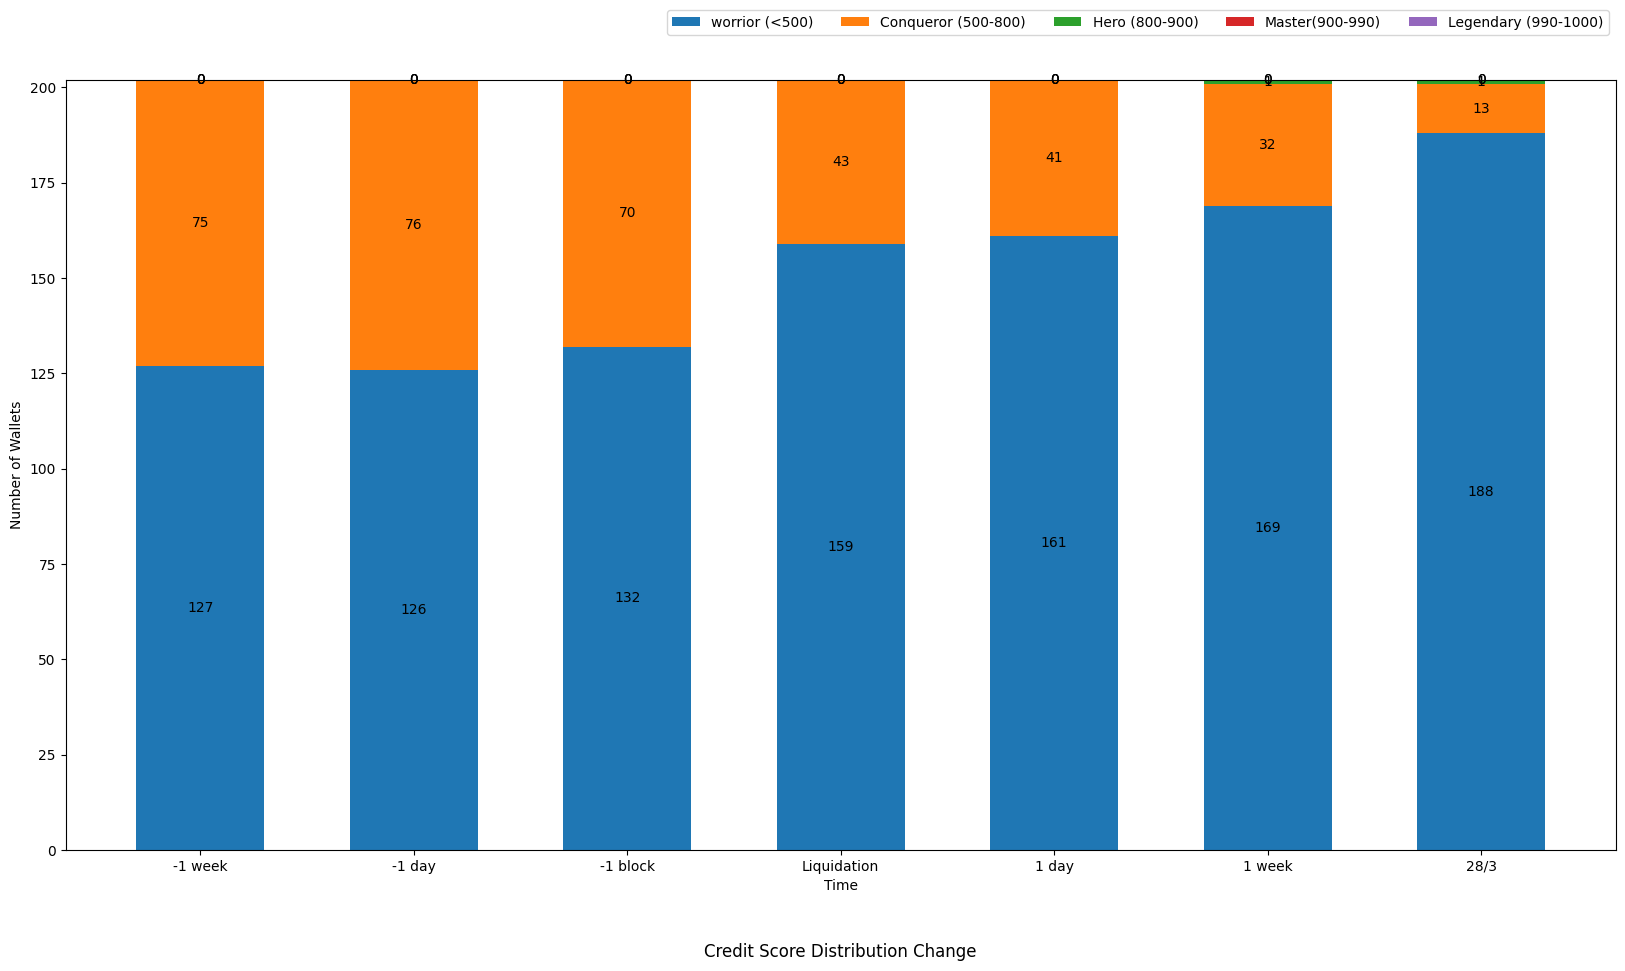

In [44]:
m = {
    'one_week_bf':[value["one_week_bf"] for key, value in data.items()],
    'one_day_bf':[value["one_day_bf"] for key, value in data.items()],
    'before_liquidate':[value["before_liquidate"] for key, value in data.items()],
    'in_liquidate':[value["in_liquidate"] for key, value in data.items()],
    'one_day_af':[value["one_day_af"] for key, value in data.items()],
    'one_week_af':[value["one_week_af"] for key, value in data.items()],
    'current_time':[value["current_time"] for key, value in data.items()]
}
sex_counts = {
    'worrior (<500)': [],
 'Conqueror (500-800)': [],
 'Hero (800-900)': [],
 'Master(900-990)': [],
 'Legendary (990-1000)': []
}
for key in m:
    tmp = gen_pie(m[key])
    for i in sex_counts:
        sex_counts[i].append(tmp[i])
for i in sex_counts:
    sex_counts[i] = np.array(sex_counts[i])
keys = {
    'one_week_bf':"-1 week", 'one_day_bf':'-1 day','before_liquidate':'-1 block', 'in_liquidate':'Liquidation',  'one_day_af':'1 day',
       'one_week_af':'1 week','current_time':'28/3'
}
species = list(keys.values())
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(20, 10))
bottom = np.zeros(7)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Credit Score Distribution Change', y=-0.15)
ax.set_xlabel('Time')
ax.set_ylabel('Number of Wallets')
ax.legend(bbox_to_anchor=(1, 1.1), ncols=5)

plt.show()

In [41]:

data=df
result = {"address":[],"time":[], "value":[]}
keys = {
    'one_week_bf':"-1 week", 'one_day_bf':'-1 day','before_liquidate':'-1 block', 'in_liquidate':'Liquidation',  'one_day_af':'1 day',
       'one_week_af':'1 week','current_time':'28/3'
}
for i in ['one_week_bf','one_day_bf','before_liquidate','in_liquidate', 'one_day_af','one_week_af','current_time']:
    list_ = list(data[i])
    for key in range(len(list_)):
        result["value"].append(list_[key])
        result["address"].append(list(data["address"])[key])
        result["time"].append(keys[i])
result = pd.DataFrame(result)
sns.set_theme(font_scale=1)
ax = sns.lineplot(x="time", y="value",ci=None,
             data=result, legend=False)
ax.set_title('Mean Credit Score Change', y=-0.250)

KeyError: 'one_week_bf'

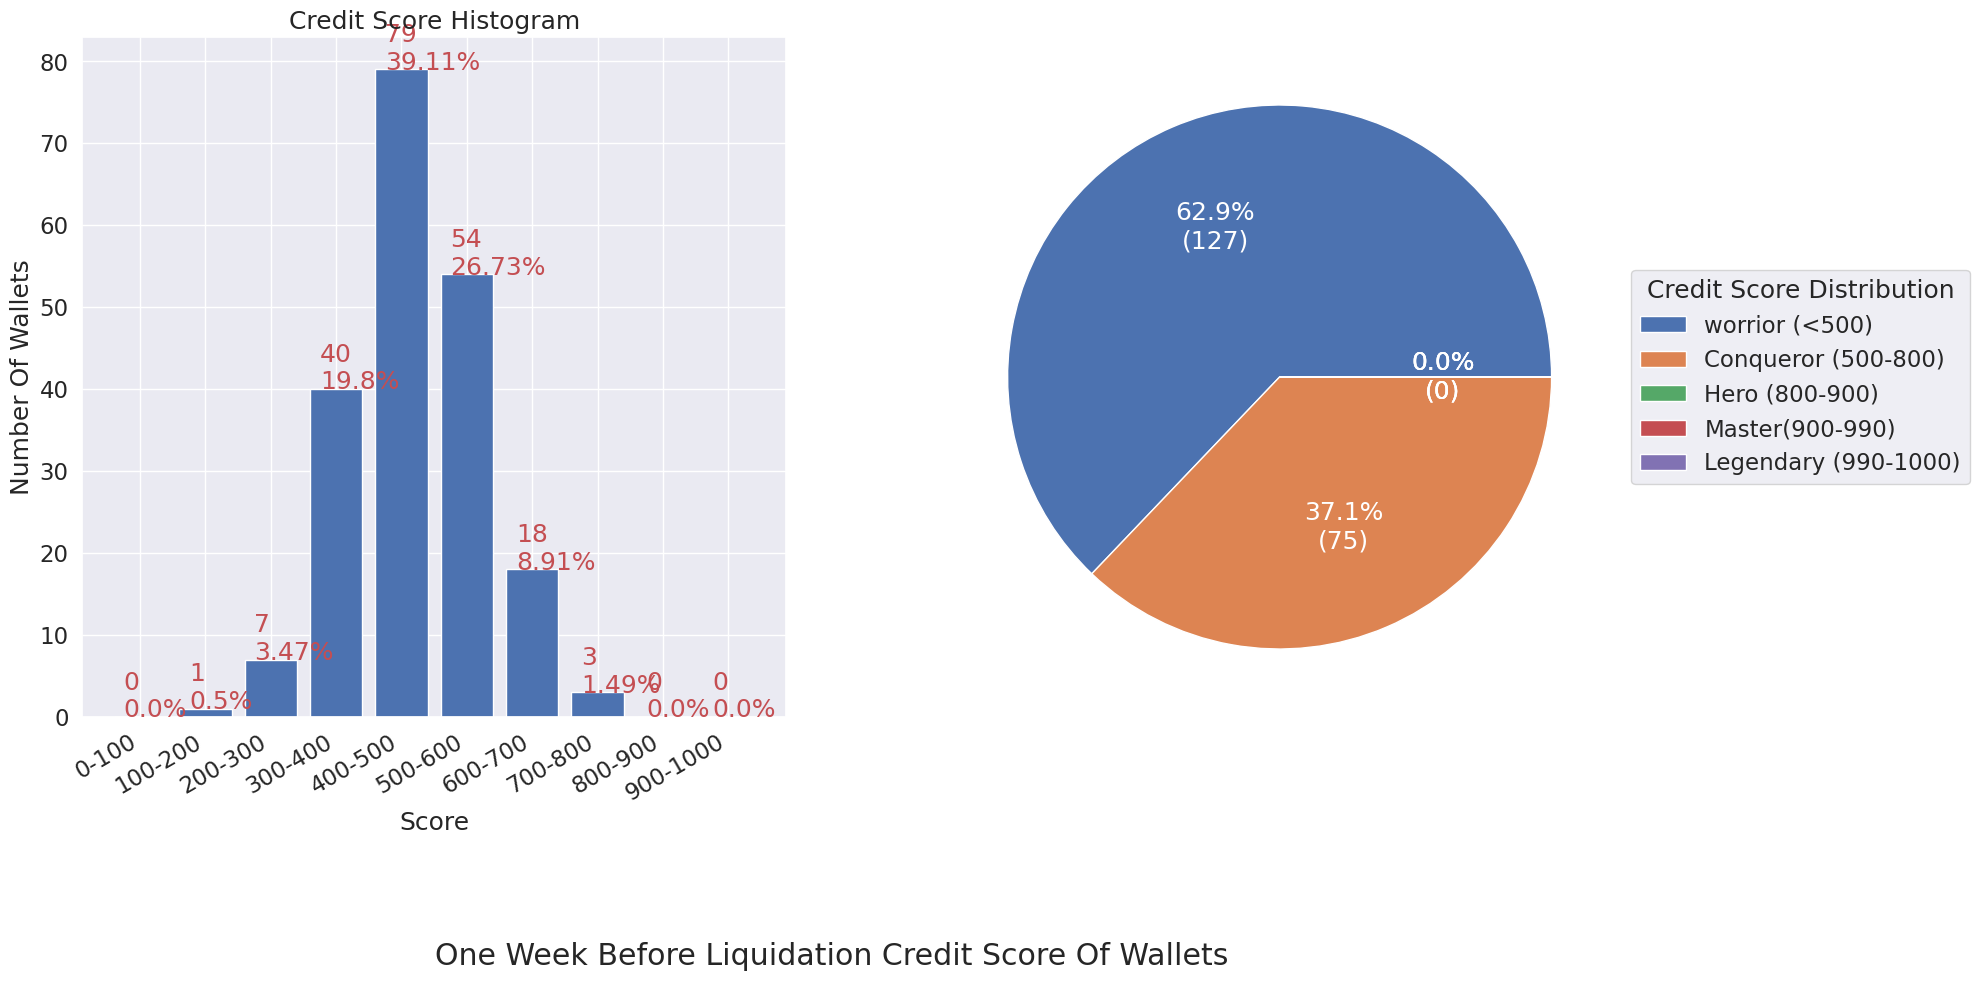

In [60]:
m = [value["one_week_bf"] for key, value in data.items()]
draw_chart(m, "Number Of Wallets", 'Score', 'Credit Score Histogram', "Credit Score Distribution", "One Week Before Liquidation Credit Score Of Wallets")

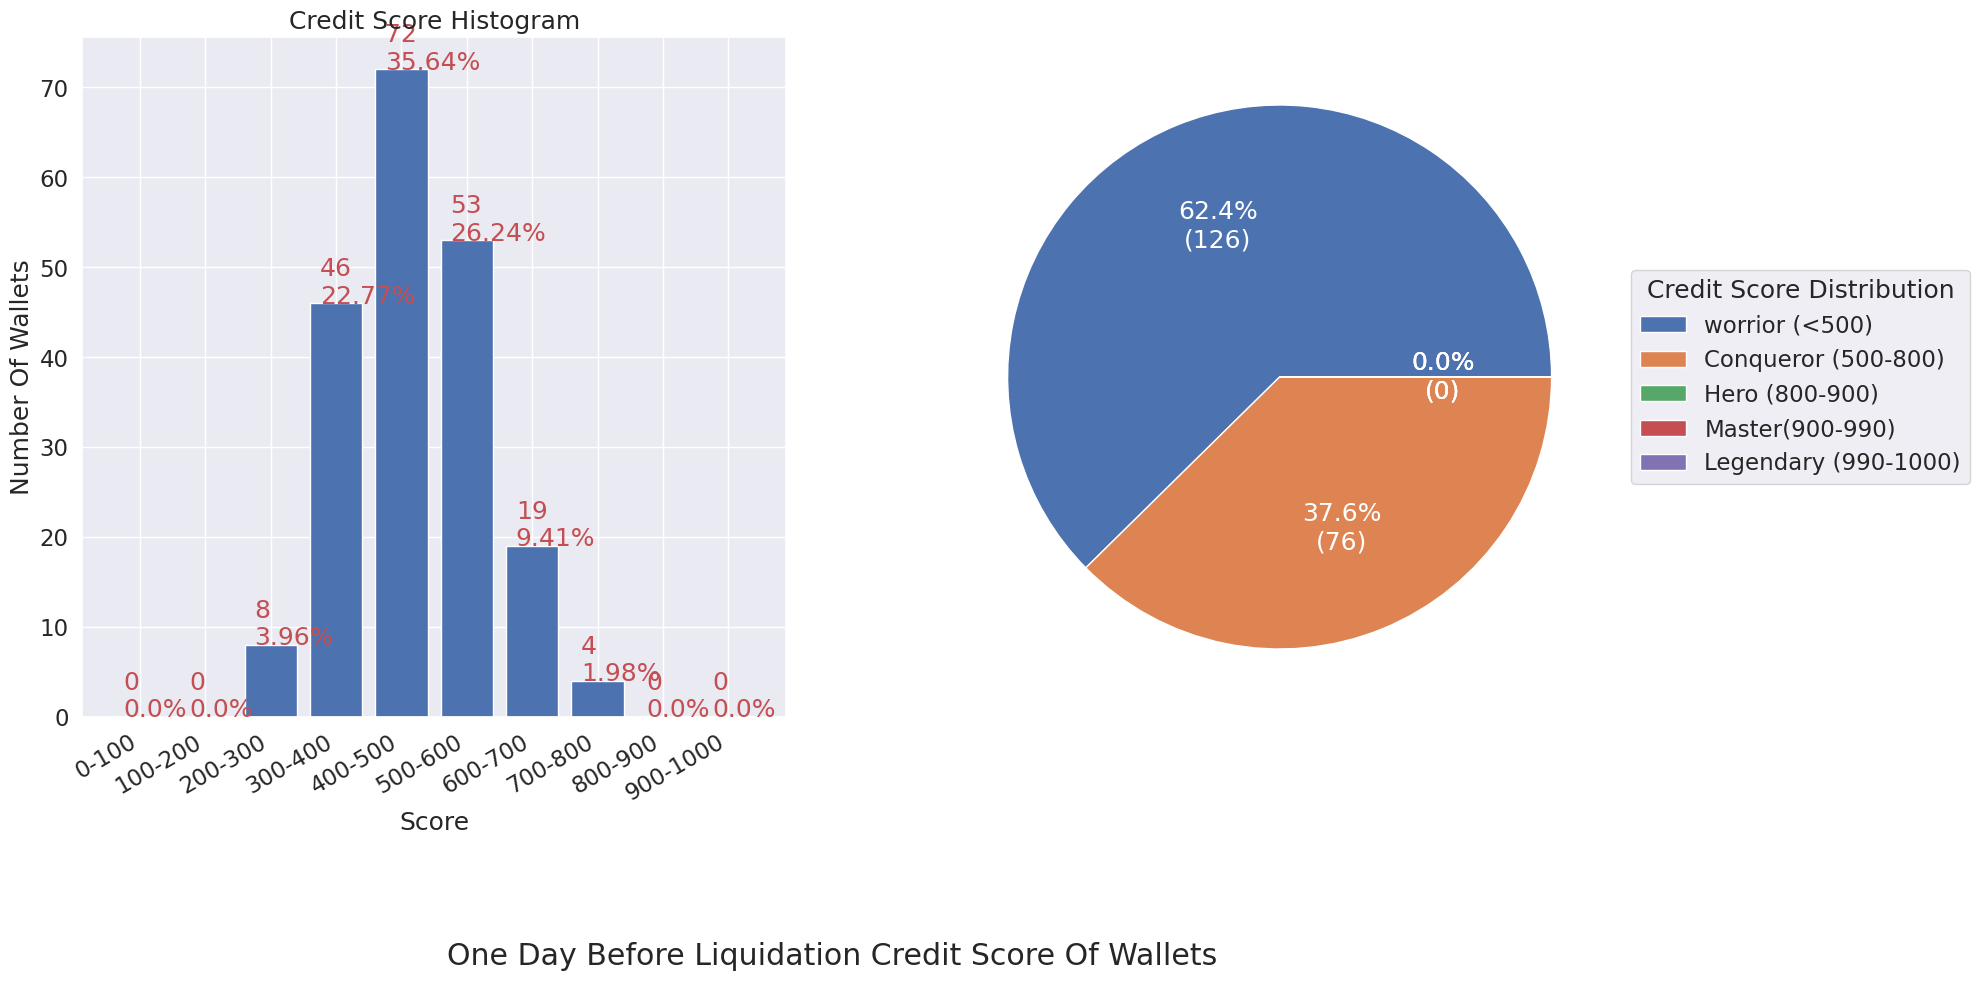

In [61]:
m = [value["one_day_bf"] for key, value in data.items()]
draw_chart(m, "Number Of Wallets", 'Score', 'Credit Score Histogram', "Credit Score Distribution", "One Day Before Liquidation Credit Score Of Wallets")

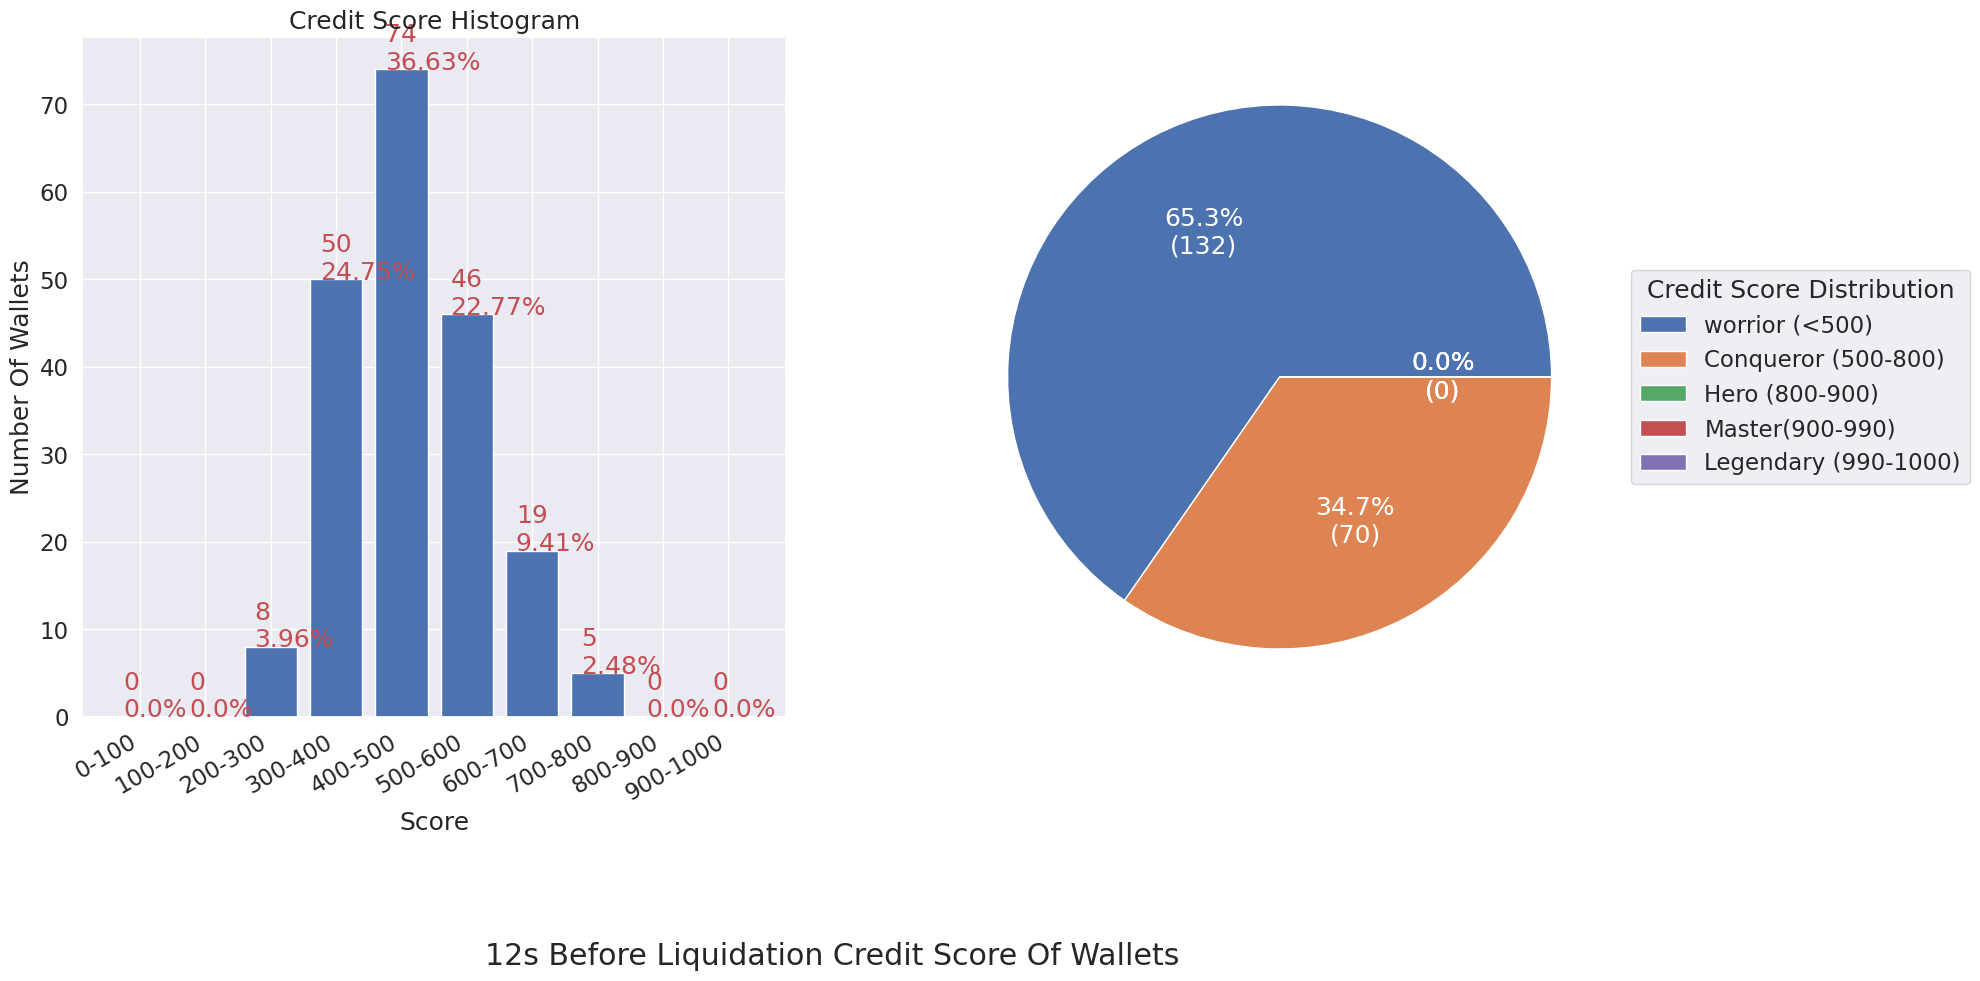

In [62]:
m = [value["before_liquidate"] for key, value in data.items()]
draw_chart(m, "Number Of Wallets", 'Score', 'Credit Score Histogram', "Credit Score Distribution", "12s Before Liquidation Credit Score Of Wallets")

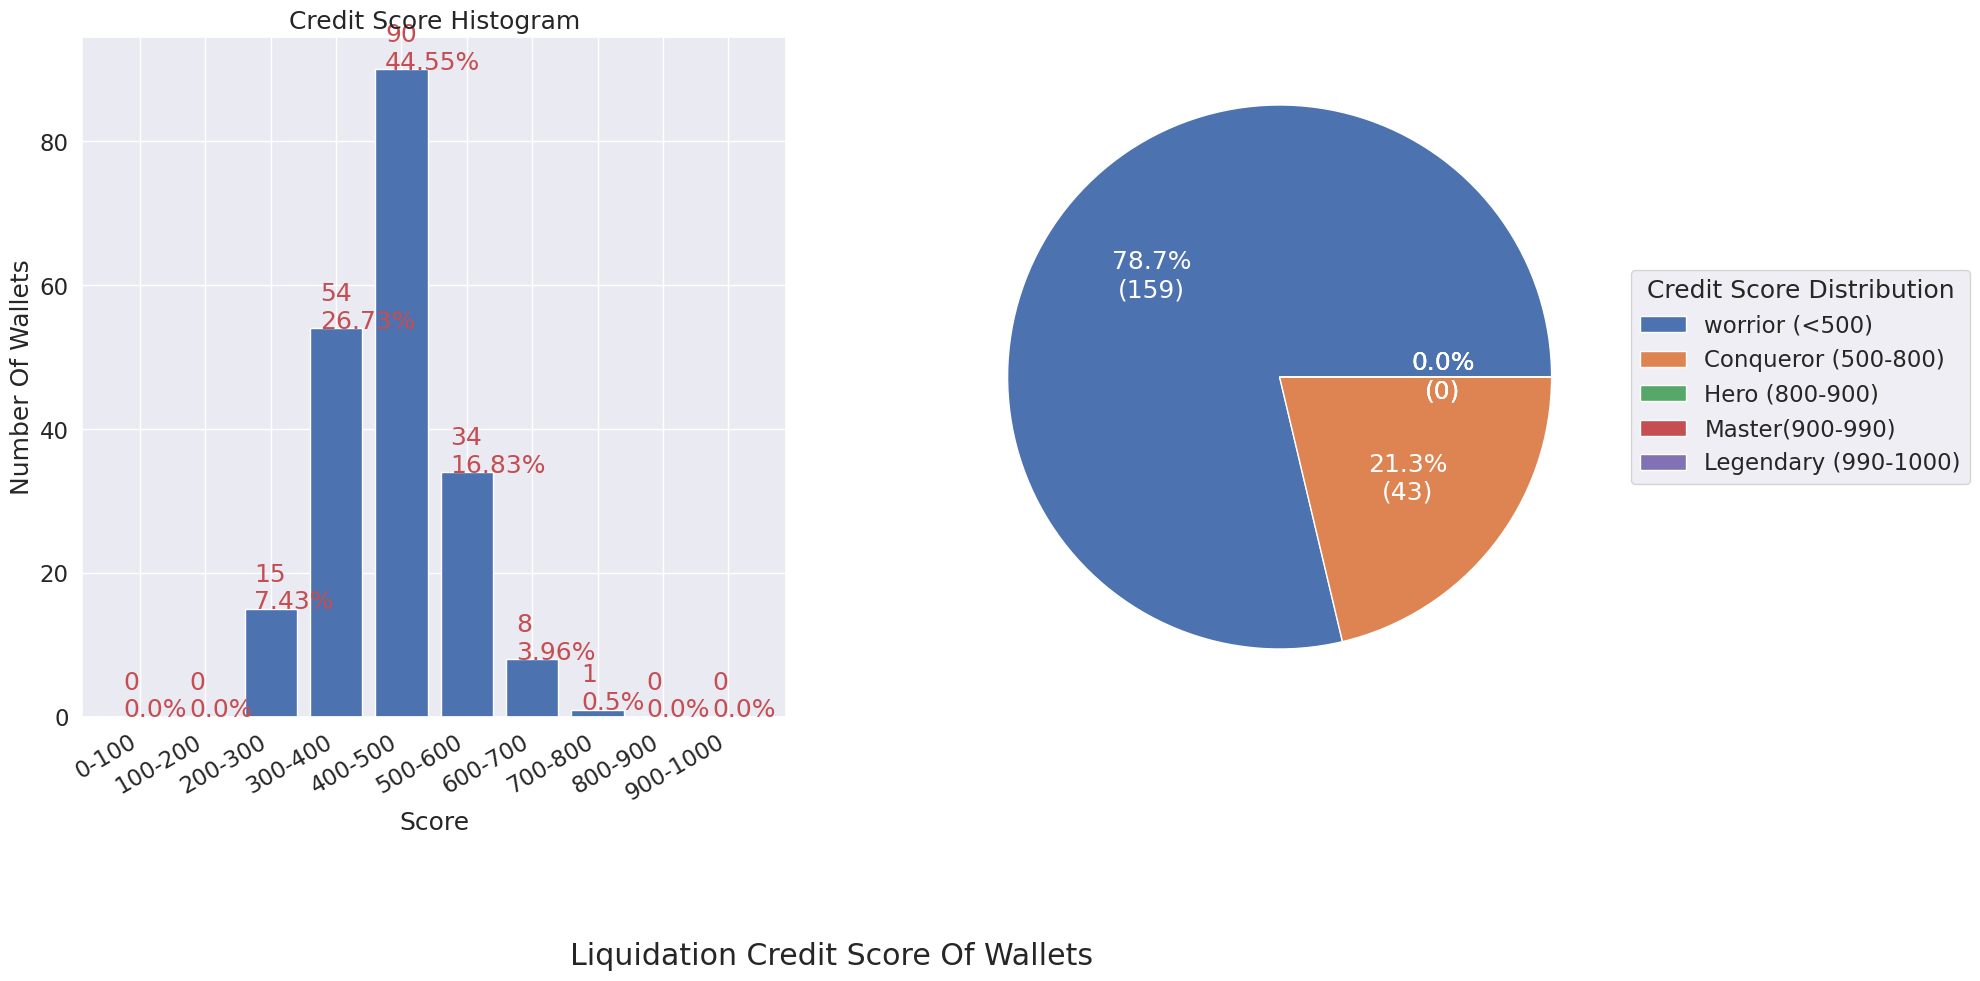

In [63]:
m = [value["in_liquidate"] for key, value in data.items()]
draw_chart(m, "Number Of Wallets", 'Score', 'Credit Score Histogram', "Credit Score Distribution", "Liquidation Credit Score Of Wallets")

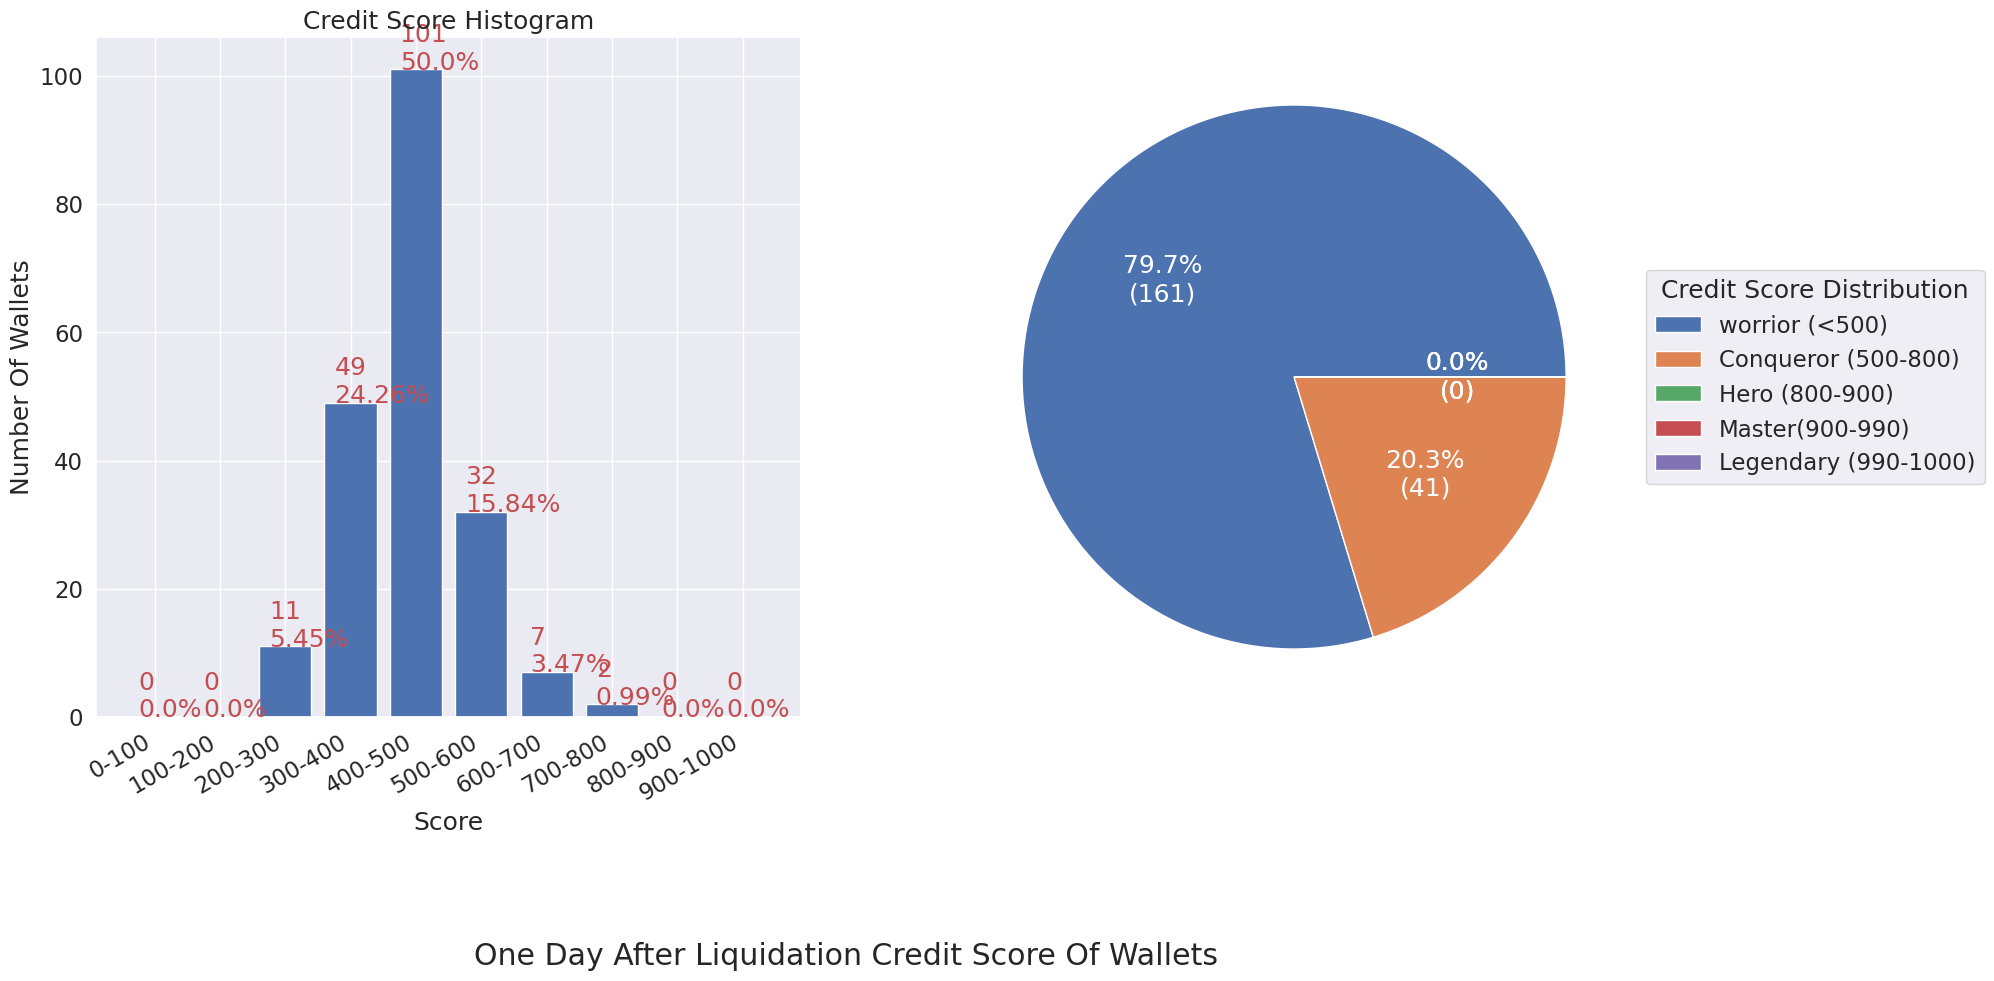

In [64]:
m = [value["one_day_af"] for key, value in data.items()]
draw_chart(m, "Number Of Wallets", 'Score', 'Credit Score Histogram', "Credit Score Distribution", "One Day After Liquidation Credit Score Of Wallets")

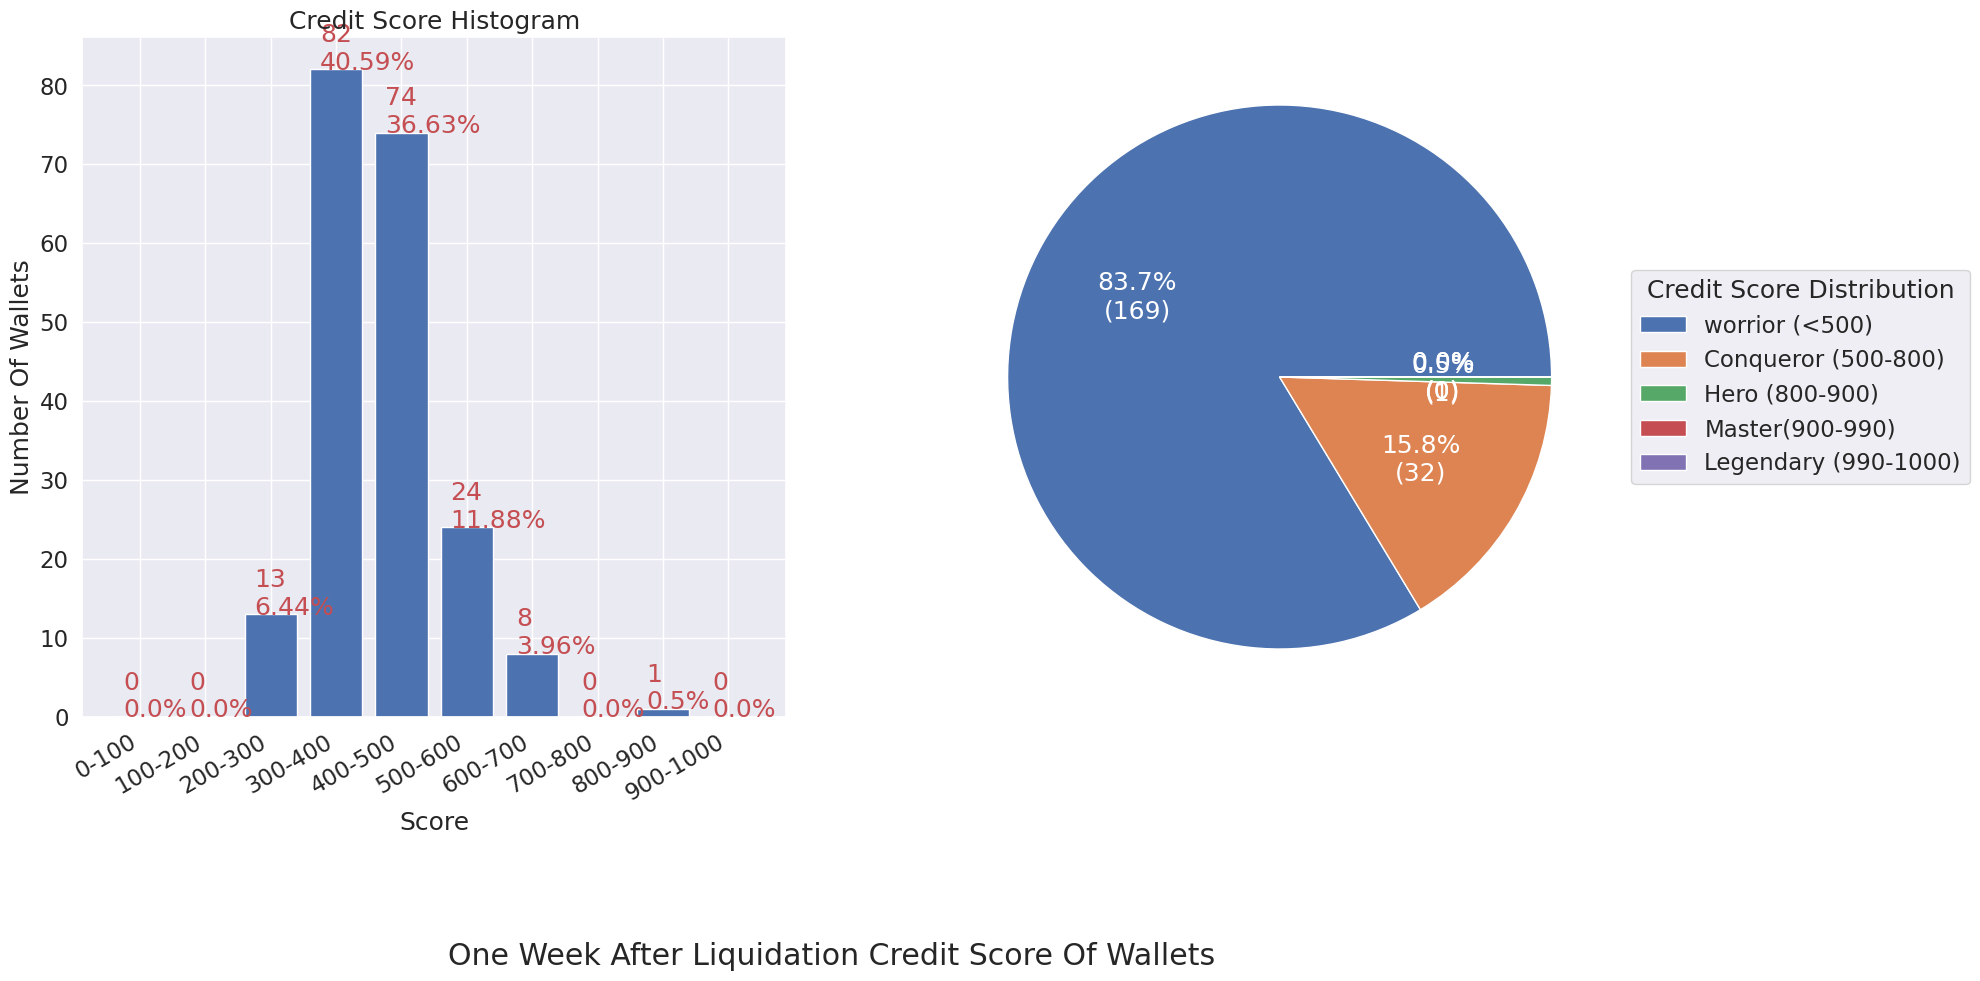

In [65]:
m = [value["one_week_af"] for key, value in data.items()]
draw_chart(m, "Number Of Wallets", 'Score', 'Credit Score Histogram', "Credit Score Distribution", "One Week After Liquidation Credit Score Of Wallets")

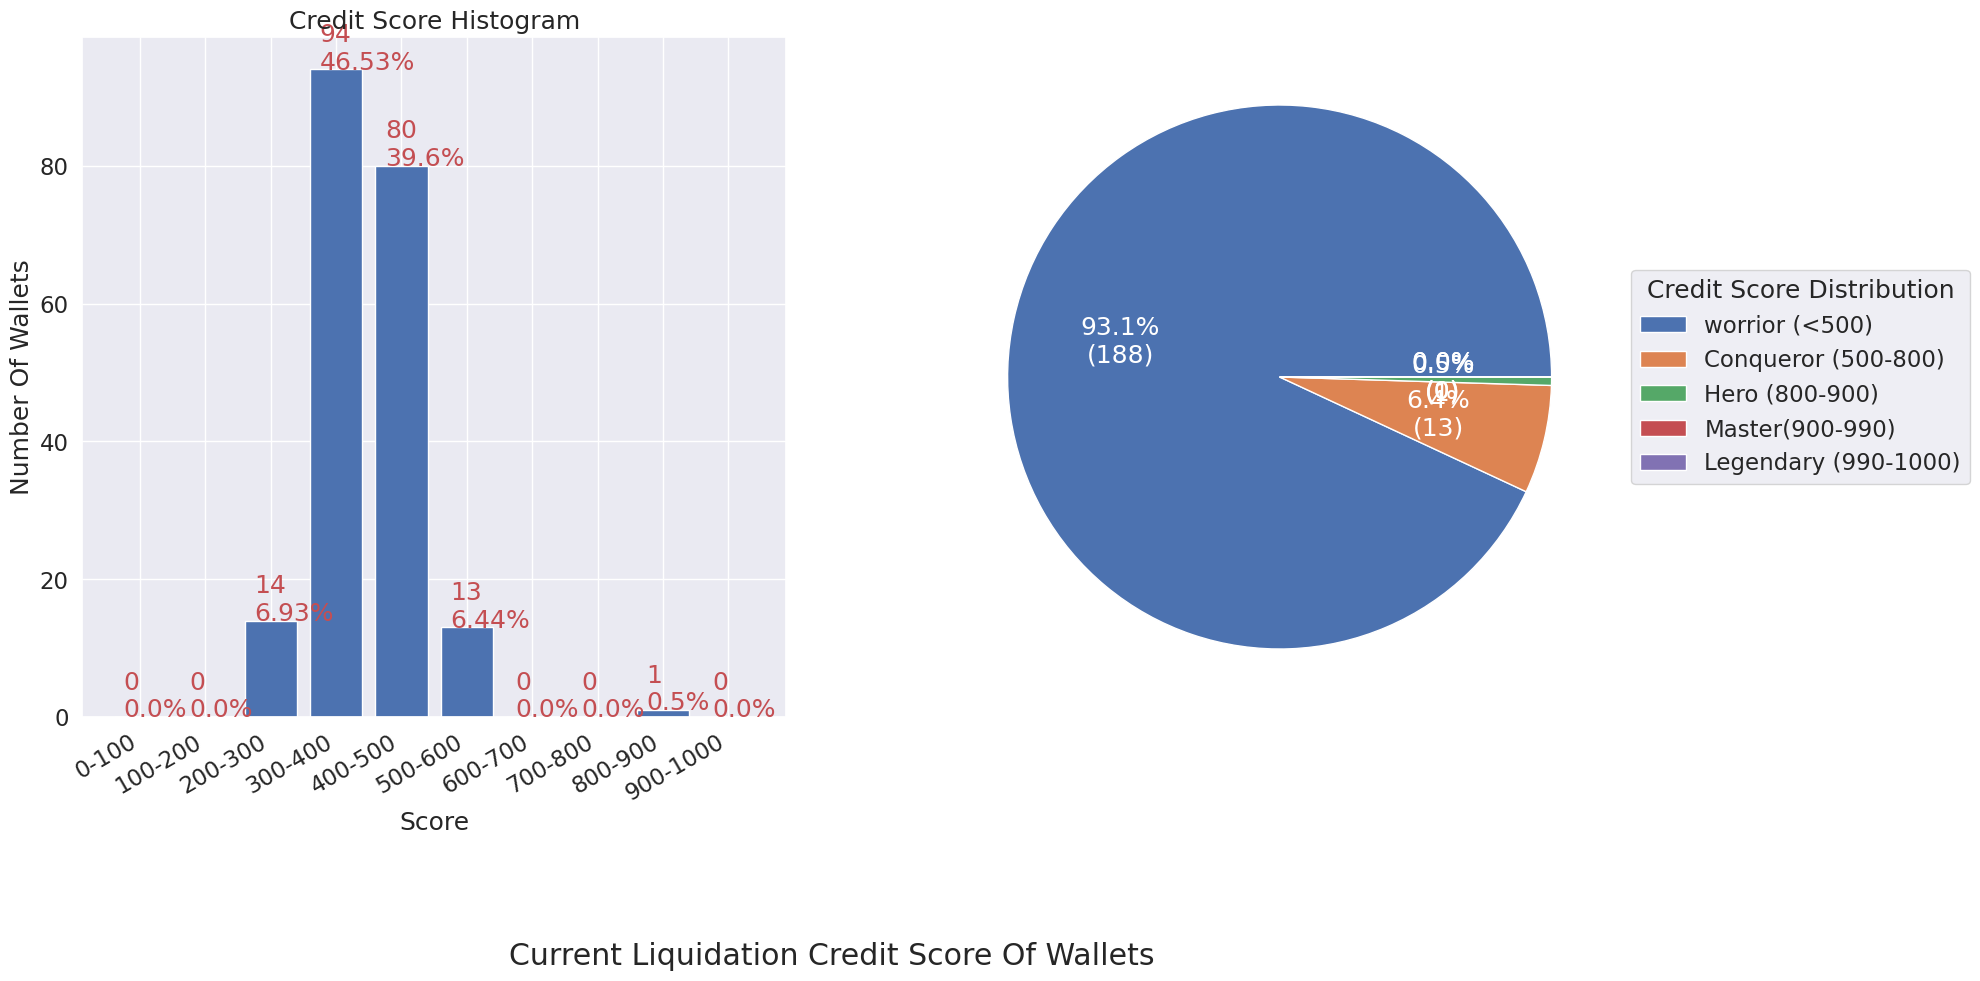

In [66]:
m = [value["current_time"] for key, value in data.items()]
draw_chart(m, "Number Of Wallets", 'Score', 'Credit Score Histogram', "Credit Score Distribution", "Current Liquidation Credit Score Of Wallets")

In [28]:
df.describe()

,number,amount,one_week_bf,one_day_bf,before_liquidate,in_liquidate,after_liquidate,one_day_af,one_week_af,current_time
count,202.000000,2.020000e+02,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,1.485149,9.209582e+04,470.123762,468.930693,462.896040,434.405941,434.405941,438.366337,417.960396,398.133663
std,1.309087,5.290500e+05,100.631486,104.156002,104.473587,91.132693,91.132693,87.700840,89.730544,69.096709
min,1.000000,4.655993e+01,120.000000,247.000000,247.000000,236.000000,236.000000,237.000000,230.000000,243.000000
25%,1.000000,6.883846e+02,414.750000,380.000000,376.500000,371.750000,371.750000,387.250000,354.250000,355.250000
50%,1.000000,2.810879e+03,461.000000,457.500000,452.500000,427.000000,427.000000,428.000000,405.000000,395.000000
75%,1.000000,3.051390e+04,539.750000,543.500000,540.000000,484.750000,484.750000,488.250000,473.250000,437.500000
max,9.000000,7.326438e+06,774.000000,772.000000,781.000000,776.000000,776.000000,774.000000,817.000000,817.000000


In [23]:
addresses = list(df[(df['current_time']>500) & (df['in_liquidate']>500)]['address'].values)

In [98]:
df[(df['in_liquidate']>500)].describe()

,number,amount,one_week_bf,one_day_bf,before_liquidate,in_liquidate,after_liquidate,one_day_af,one_week_af,current_time
count,42.000000,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1.428571,2.629432e+05,592.547619,603.380952,602.428571,567.857143,567.857143,561.190476,524.214286,451.619048
std,1.212594,1.131179e+06,71.244068,70.285117,72.682787,54.422723,54.422723,67.085035,96.049412,81.815662
min,1.000000,1.537303e+02,375.000000,376.000000,376.000000,501.000000,501.000000,375.000000,358.000000,352.000000
25%,1.000000,1.108036e+03,544.000000,554.250000,550.750000,531.250000,531.250000,526.000000,480.250000,410.750000
50%,1.000000,6.858034e+03,596.500000,605.500000,607.000000,556.000000,556.000000,554.500000,529.000000,433.500000
75%,1.000000,6.633721e+04,632.750000,636.750000,639.750000,591.000000,591.000000,595.500000,570.250000,482.750000
max,8.000000,7.326438e+06,774.000000,772.000000,781.000000,776.000000,776.000000,774.000000,817.000000,817.000000


In [24]:
df[(df['current_time']>500) & (df['in_liquidate']>500)]['address'].values

array(['0x5eb1ca2d9d250ffad144c7b6f0191fafc97ae1ee',
       '0xd84ed0cc0a385337a9c98c9d0eb30a952f3970af',
       '0xd79fe5ca182b112e62d1466068b572493b88cb24',
       '0x60ee8465dc43245c6c2989b1089e476d3a0a717d',
       '0xdb768efff52b7e5114988629dee73533663edce1',
       '0x21cfe08c7ddb08a8e5fa04baac8b2a1457696731',
       '0x6fce63859a859a0f30ed09b12f5010d790618ca4',
       '0xfb50928e5e618a3dfae92e7c7e7818a5f80c4bc2',
       '0x0da62d394cdf09986e43a8c6c3b6125c51d903cd',
       '0xcba1a275e2d858ecffaf7a87f606f74b719a8a93'], dtype=object)

In [33]:
remove = df[df['one_day_af']>df['in_liquidate']]['address']
remove = [i for i in remove]
data=df
result = {"address":[],"time":[], "value":[]}
keys = {
    'one_week_bf':1, 'one_day_bf':2,'before_liquidate':3, 'in_liquidate':4,  'one_day_af':5,
       'one_week_af':6,'current_time':7
}
for i in ['one_week_bf', 'one_day_bf','before_liquidate', 'in_liquidate', 'one_day_af','one_week_af',
       'current_time']:
    list_ = list(data[i])
    for key in range(len(list_)):
        if data["address"][key] in remove: 
            continue
        result["value"].append(list_[key])
        result["address"].append(list(data["address"])[key])
        result["time"].append(keys[i])
        
result = pd.DataFrame(result)
sns.set_theme(font_scale=1)
sns.lineplot(x="Time", y="Mean Score",
             data=result, legend=False)

ValueError: Could not interpret value `TIme` for parameter `x`

In [7]:
result = []
for address in data.keys():
    query = f'''
    for i in wallets
    filter i.address == '{address}'
    return i
    '''
    cursor = db.aql.execute(query, batch_size=10000)
    balance_ = 0
    balance = {}
    for i in cursor:
        for timestamp in i['balanceChangeLogs']:
            if timestamp in balance:
                balance[timestamp] += i['balanceChangeLogs'][timestamp]
            else:
                balance[timestamp] = i['balanceChangeLogs'][timestamp]
        key = list(balance.keys())
        key.sort()
        key = key[-1]
        balance_ += balance[key]
    result.append({
        '_key': address,
        'balanceChangeLogs': balance,
        'balanceInUSD': balance_
    })
multichain_wallet.import_bulk(result, sync=True, on_duplicate='update')

{'error': False,
 'created': 0,
 'errors': 0,
 'empty': 0,
 'updated': 202,
 'ignored': 0,
 'details': []}